# GATHERING DATA

In [1]:
#importing the needed modules for gathering our data
import pandas as pd
import requests as re
import numpy as np
import json 

In [2]:
# after downloading the Twitter archive csv data from udacity,
# importing it into a DataFrame using the 'read_csv()' function
enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# creating a function to help download files using the Requests library 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
def resp(urls):
    return re.get(urls)    
response = resp(url)

In [4]:
#  writing the file downloaded above into a file 'image-predictions.tsv'
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [5]:
# importing the tweet image predictions TSV file downloaded above into a DataFrame
image_df = pd.read_csv('image-predictions.tsv', '\t')

In [6]:
# As the queryng the Twitter API for each tweet's JSON file was not able to be carried out.
# the tweet-json.txt file was downloaded directly using the Requests library
url= 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
answer = resp(url)

In [7]:
# the tweet-json.txt was created and the response from the request above was written
# into it 
with open('tweet-json.txt', 'wb') as file:
    file.write(answer.content)

In [8]:
# creating a list of dictionaries to read the tweet's JSON txt file data line by line
tweet_df = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        my_file = json.loads(line)
        # appending the required data i.e id, retweet_count, favorite_count, display_text_range
        # to the list of dictionaries
        tweet_df.append({'tweet_id': my_file['id'],
                       'retweet_count': my_file['retweet_count'],
                       'favorite_count': my_file['favorite_count'],
                       'display_text_range': my_file['display_text_range']})

In [9]:
# converting the list tweet_df to a DataFrame 
tweet_df = pd.DataFrame.from_dict(tweet_df)

# ASSESSING DATA

we have 3 dataframes which are the :
*tweet_df* : which contains the data from our json file containing the raw data soourced from twitter
*enhanced_df*: which contains the partially clean data from twitter
and the 
*image* dataframe: which contains the data gotten from the image predictions neural network

In [10]:
enhanced_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


- **tweet_id**: the unique identifier for each tweet
- **in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- **timestamp**: time when this Tweet was created
- **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text**: actual UTF-8 text of the status update
- **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- **retweeted_status_timestamp**: time of retweet
- **expanded_urls**: tweet URL
- **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
- **display_text_range**: 
- **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- **name**: name of the dog
- **doggo**: one of the 4 dog "stage". An affectionate term for dogs.
- **floofer**: one of the 4 dog "stage". A word for a very big dog, used affectionately.
- **pupper**: one of the 4 dog "stage". An affectionate word for puppies.
- **puppo**: one of the 4 dog "stage"

In [11]:
enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
enhanced_df.shape

(2356, 17)

In [13]:
sum(enhanced_df.duplicated())

0

In [14]:
# to check out the name column and to make pandas display the entire result
pd.set_option("display.max_rows", None)
enhanced_df.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Penny              10
Lola               10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
Toby                7
an                  7
Buddy               7
Bailey              7
Daisy               7
Koda                6
Dave                6
Scout               6
Jack                6
Milo                6
Rusty               6
Stanley             6
Oscar               6
Bella               6
Jax                 6
Leo                 6
very                5
Louis               5
Sammy               5
Oakley              5
Gus                 5
George              5
Larry               5
Alfie               5
Chester             5
Finn                5
Phil                5
Sunny               5
Bentley             5
Clark               4
Jerry               4
Cassie              4
Shadow    

In [15]:
# to confirm if the data has differring denominators
enhanced_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
# to check out the numerators
enhanced_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
# determining the total missing expanded_urls
enhanced_df['expanded_urls'].isnull().sum()

59

In [18]:
# creating a dataframe which contains the various dog stages
df = enhanced_df.loc[:, "doggo":]

In [19]:
# using the collections library to count the amount of unique values in the entire dataframe 
from collections import Counter
def counting(column):
    counts = Counter(column)
    return counts
print(counting(df['doggo']),counting(df['floofer']),counting(df['pupper']),counting(df['puppo']))

Counter({'None': 2259, 'doggo': 97}) Counter({'None': 2346, 'floofer': 10}) Counter({'None': 2099, 'pupper': 257}) Counter({'None': 2326, 'puppo': 30})


In [20]:
# checking to see if any tweet_id contains data for more than one dog stage
print('there is {} row which contains data for both doggo and floofer stage'.format(len(df[(df.doggo != 'None') & (df.floofer != 'None')])))
print('there is {} row which contains data for both doggo and puppo stage'.format(len(df[(df.doggo != 'None') & (df.puppo != 'None')])))
print('there is {} rows which contains data for both doggo and pupper stage'.format(len(df[(df.doggo != 'None') & (df.pupper != 'None')])))

there is 1 row which contains data for both doggo and floofer stage
there is 1 row which contains data for both doggo and puppo stage
there is 12 rows which contains data for both doggo and pupper stage


## The image predictions data table

In [21]:
image_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


`image_df` (tweet image predictions) columns:
- **tweet_id**: the unique identifier for each tweet
- **jpg_url**: dog's image URL
- **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- **p1**: algorithm's #1 prediction for the image in the tweet
- **p1_conf**: how confident the algorithm is in its #1 prediction
- **p1_dog**: whether or not the #1 prediction is a breed of dog
- **p2**: algorithm's #2 prediction for the image in the tweet
- **p2_conf**: how confident the algorithm is in its #2 prediction
- **p2_dog**: whether or not the #2 prediction is a breed of dog
- **p3**: algorithm's #3 prediction for the image in the tweet
- **p3_conf**: how confident the algorithm is in its #3 prediction
- **p3_dog**: whether or not the #3 prediction is a breed of dog

In [22]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
sum(image_df.duplicated())

0

In [24]:
tweet_df.head(3)

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"


`tweet_df` (tweet status) columns:
- **tweet_id**: the unique identifier for each tweet
- **retweet_count**: number of times this Tweet has been retweeted
- **favorite_count**: indicates approximately how many times this Tweet has been liked by Twitter users
- **display_text_range**: an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the Tweet

In [25]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [26]:
sum(tweet_df.tweet_id.duplicated())

0

In [27]:
print('the number of entries in the three tables are, tweet_df has {}, enhanced_df has {}, image has {}'.format(len(tweet_df),len(enhanced_df),len(image_df)))

the number of entries in the three tables are, tweet_df has 2354, enhanced_df has 2356, image has 2075


In [28]:
# the number of missing twitter ids in the tweet_df table and in the
# image table, also in tweet_df but not in image but are in the enhanced_df table are 
len(enhanced_df[~enhanced_df.tweet_id.isin(image_df.tweet_id)]),len(enhanced_df[~enhanced_df.tweet_id.isin(tweet_df.tweet_id)]),len(tweet_df[~tweet_df.tweet_id.isin(image_df.tweet_id)])

(281, 2, 281)

#### this shows that there are some tweet_ids present in enhanced_df table but are not in the image table but while there are two missing tweet_ids in the tweet_df table which is present in the enhanced_df, the image table still has the same missing ids in the tweet_df

# Quality issues
##### `enhanced_df` (Twitter archive) table
- ID column is in int format instead of str
- many *tweet_id*(s) of `enhanced_df` table are missing in `image` (image predictions) and some in tweet_df tables
- Timestamp column in enhanced_twitter is in object format instead of datetime format 
- unnecessary html tags in *source* column e.g. `<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>`can be replaced with Twitter for iphone
- the text column contains some links which are not needed
- *rating_denominator* column has values greater than 10, which is the most prevalent, so reducing this so that most denominators are 10 for easy analysis
- erroneous dog names which are unlikely (e.g. a, an, actually, by)
- some tweet_id contain data which are in more than one dog stage 
- null values in the columns, which will be adjusted as the cleaning progresses

##### `image_df` (image_predictions) table
- ID column in int format instead of str

# Tidiness issues
- some columns from the image_df(image predictions) and the tweet_df(tweet status) table should be merged into the enhanced_df table to better analyze the data e.g. the p1 column in image_df, retweet_count and favorite_count column in tweet_df table
- the doggo, floofer, pupper and puppo columns in enhanced_df table should be merged into one column named "dog_stage"
- some columns in the enhanced_df table are not needed for the analysis and should be dropped e.g  retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns etc.

## Cleaning Data

In [29]:
# first taking a copy of enhanced_df on which the cleaning tasks will be carried out
clean_df = enhanced_df.copy()
img_clean=image_df.copy()
tweet_clean=tweet_df.copy()

## Quality

ID columns in the three dataframe are in int format instead of str

#### *Define*

convert the tweet_id column to str

#### *Code*

In [30]:
clean_df.tweet_id = clean_df.tweet_id.astype(str)
img_clean.tweet_id = img_clean.tweet_id.astype(str)
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)

#### *Test*

In [31]:
clean_df.tweet_id.dtype, img_clean.tweet_id.dtype, tweet_clean.tweet_id.dtype

(dtype('O'), dtype('O'), dtype('O'))

this shows that it has being converted to the object format

#### *Define*
keeeping only the records whose tweet_ids exists in image table and the tweet_df table 

*code*

In [32]:
clean_df = clean_df[clean_df.tweet_id.isin(img_clean.tweet_id)]

In [33]:
clean_df =clean_df[clean_df.tweet_id.isin(tweet_clean.tweet_id)]

*Test*

In [34]:
len(clean_df[~clean_df.tweet_id.isin(img_clean.tweet_id)])

0

In [102]:
len(clean_df[~clean_df.tweet_id.isin(tweet_clean.tweet_id)])

0

In [35]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dtypes: float64(4), int64(2), obje

## Quality

enhanced_df: erroneous datatype(*timestamp* columns)

#### *Define*

Convert timestamp to datetime format

#### *Code*

In [36]:
clean_df.timestamp=pd.to_datetime(clean_df.timestamp)

#### *Test*

In [37]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns, UTC]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dtypes: datetime64[ns

## Quality

<strong>*enhanced_df*</strong>: unnecessary additions in the source column (i.e <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a> instead of the just 'Twitter for iphone')

#### *Define*
Strip all html anchor tags in the source column and return just the text between thr
tags, also converting it to categorical datatype from object

#### *Code*

In [38]:
clean_df.source=clean_df.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [39]:
clean_df.source = clean_df.source.astype('category')

#### *Test*

In [40]:
# examining the whole dataframe to see if there is any decrease in entries
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns, UTC]
source                        2073 non-null category
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
dtypes: category(1)

In [41]:
clean_df.source.value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

 cleaning the ratings so that most ratings are with a denominator of 10 are retained for easy analysis.   

#### *Define*
for rows whose rating_denomnator is greater than 10 but divisible by 10 e.g denominator being 40, 70, 90 but numerator being 44, 84, 90 we can notice that the denominator is divisible by 10 an the numerator is divisible by the quotiet of the denominator divided by 10, so we can simply reduce the fraction to a simpler one with denominator 10 and the numeratoe reduced to still reflect the rating.

In [42]:
# regex to match fractions
import re
pattern = "\s*(\d+([.]\d+)?([/]\d+))"

# function which will match the above pattern and return an array of fractions, if any
def tokens(x):
  return [m.group(1) for m in re.finditer(pattern, x)]

In [43]:
# iterate through all those records whose rating_denominator is not 10
for i, row in clean_df[clean_df.rating_denominator != 10].iterrows():
    d = row.rating_denominator
    
    # if rating_denominator is greater than 10 and divisible by 10
    if d > 10 and d%10 == 0:
        # assign divisor as the quotient so as to reduce the fraction
        divisor = d/10
        n = row.rating_numerator
        
        # if rating_numerator is greater than 10 and divisible by the divisor
        if n%divisor == 0:
            # reassign rating_denominator as 10
            clean_df.set_value(i, 'rating_denominator', 10)
            # reassign rating_numerator as the quotient of rating_numerator by divisor
            clean_df.set_value(i, 'rating_numerator', int(n/divisor))
    
    # for all those records whose rating_denominator is either less than 10 or not divisible by 10
    else:
        # extract all fractions(ratings) from text using tokens function
        ratings = tokens(row.text)
        # iterate through all the fractions
        for rating in ratings:
            # if denominator of any such fraction is equal to 10
            if rating.split('/')[1] == '10':
                # reassign rating_denominator as 10
                clean_df.set_value(i, 'rating_denominator', 10)
                # reassign rating_numerator as the numerator value of this fraction
                clean_df.set_value(i, 'rating_numerator', int(round(float(rating.split('/')[0]))))
                break

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


#### *Test*

In [44]:
clean_df.rating_numerator.value_counts()

12      477
10      432
11      419
13      283
9       152
8        95
7        51
14       41
5        34
6        32
3        19
4        15
2        10
1         4
0         2
75        1
24        1
26        1
27        1
1776      1
15        1
420       1
Name: rating_numerator, dtype: int64

#### *Define*
replacing all unlikely names with None and since they all start with lowercase letters, we can simply use regex

In [45]:
clean_df['name'][clean_df['name'].str.match('[a-z]+')] = 'None'

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
clean_df.name.value_counts()

None              677
Charlie            11
Oliver             10
Penny              10
Tucker             10
Cooper             10
Lucy               10
Winston             8
Lola                8
Sadie               8
Bo                  8
Toby                7
Daisy               7
Scout               6
Stanley             6
Dave                6
Jax                 6
Bella               6
Bailey              6
Koda                6
Rusty               6
Milo                6
Larry               5
Oscar               5
Leo                 5
Buddy               5
Alfie               5
Louis               5
Chester             5
Phil                4
Jerry               4
Duke                4
Clark               4
Walter              4
Scooter             4
Bruce               4
Sophie              4
Bear                4
Loki                4
George              4
Ruby                4
Maggie              4
Bentley             4
Winnie              4
Gary                4
Reggie    

*enhanced_df* contains data for more than one dog stage, this will cause issues when merging the data, so consulting the dogtionary for help

In [47]:
print('there is {} row which contains data for both doggo and floofer stage'.format(len(clean_df[(clean_df.doggo != 'None') & (clean_df.floofer != 'None')])))
print('there is {} row which contains data for both doggo and puppo stage'.format(len(clean_df[(clean_df.doggo != 'None') & (clean_df.puppo != 'None')])))
print('there is {} rows which contains data for both doggo and pupper stage'.format(len(clean_df[(clean_df.doggo != 'None') & (clean_df.pupper != 'None')])))

there is 1 row which contains data for both doggo and floofer stage
there is 1 row which contains data for both doggo and puppo stage
there is 11 rows which contains data for both doggo and pupper stage


#### *Define*
for the row with doggo and floofer and the other with doggo and puppo, first manually examine the row, while for the 9 rows with doggo and upper after consulting the dogtionary, it said that doggo and pupper may sometimes be used interchangeably, though 'doggo' is a more encompasing name. "A dog would be called a "doggo" or "pupper" in DoggoLingo." paraphrased from an article on DoggoLingo from wiki https://en.wikipedia.org/wiki/DoggoLingo

*Code*

In [48]:
clean_df[(clean_df.doggo != 'None') & (clean_df.floofer != 'None')].tweet_id, clean_df[(clean_df.doggo != 'None') & (clean_df.floofer != 'None')].text 

(200    854010172552949760
 Name: tweet_id, dtype: object,
 200    At first I thought this was a shy doggo, but i...
 Name: text, dtype: object)

In [49]:
clean_df[(clean_df.doggo != 'None') & (clean_df.puppo != 'None')].tweet_id, clean_df[(clean_df.doggo != 'None') & (clean_df.puppo != 'None')].text

(191    855851453814013952
 Name: tweet_id, dtype: object,
 191    Here's a puppo participating in the #ScienceMa...
 Name: text, dtype: object)

In [50]:
clean_df.doggo[clean_df.tweet_id.isin(['854010172552949760', '855851453814013952'])] = 'None'

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


*Test*

In [51]:
print('there is {} row which contains data for both doggo and floofer stage'.format(len(clean_df[(clean_df.doggo != 'None') & (clean_df.floofer != 'None')])))
print('there is {} row which contains data for both doggo and puppo stage'.format(len(clean_df[(clean_df.doggo != 'None') & (clean_df.puppo != 'None')])))


there is 0 row which contains data for both doggo and floofer stage
there is 0 row which contains data for both doggo and puppo stage


*Code*

In [52]:
# set pupper column as None for records which have both doggo and pupper
clean_df.pupper[(clean_df.doggo != 'None') & (clean_df.pupper != 'None')] = 'None'

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


*Test*

In [53]:
print('there is {} rows which contains data for both doggo and pupper stage'.format(len(clean_df[(clean_df.doggo != 'None') & (clean_df.pupper != 'None')])))

there is 0 rows which contains data for both doggo and pupper stage


#### *Define*
As to use the best code for leaving only text in the text column of the *enhanced_df* table requires using the text range in the display_text_range column we start with the merging now of the tweet_df table, thereby leaving only the displayable text 

#### *code*

In [54]:
clean_df = pd.merge(clean_df, tweet_clean[['tweet_id', 'display_text_range']], on='tweet_id',)

In [55]:
clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,display_text_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,"[0, 85]"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,"[0, 138]"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,"[0, 121]"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,"[0, 79]"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,"[0, 138]"


In [56]:
# extracting the display_text_range  and using them to extract the displayable 
# text by using the values as a range as using a merge might lead to errors which will require cleaning
for i, r in clean_df.iterrows():
    text_range  = r.display_text_range
    display_text = r.text[text_range[0]:text_range[1]]
    clean_df.set_value(i, 'text', display_text)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


## *Tidiness*

doggo, floofer, puppo and pupper columns in the enhanced_df should be merged into one column called the 'dog_stage'

#### *Define*
merge the doggo, fluffer, puppo and the pupper columns into a column *dog_stage* column. convert the ddatatype into categorical, and then drop the doggo, fluffer, puppo and pupper columns

*Code*

In [57]:
#merge the doggo, floofer, puppo and pupper into a column dog_stage
clean_df['dog_stage'] = clean_df[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [58]:
clean_df.dog_stage = clean_df.dog_stage.astype('category')

In [59]:
clean_df.drop(['doggo','pupper','puppo','floofer'], axis=1, inplace=True)

#### *Test*

In [60]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 15 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns, UTC]
source                        2073 non-null category
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
display_text_range            2073 non-null object
dog_stage                     2073 non-null category
dtypes: category(2), datetime64[ns, UTC](1), float64(4), int64(2), object(6)
memory usage: 311.1+ KB


In [61]:
clean_df.dog_stage.value_counts()

None       1753
pupper      210
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64

- a breed column should be created from the data from the p1_conf and p1_dog columns from the image table so as to know the breed of the dogs and also remove pets which are not dogs from the table
- the retweet_count and favorite_count from the tweet_df table should be added to the clean_df for ease of analysis of our data

## Tidiness

#### *Define*
dropping the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from enhanced_df table

##### *code*

In [62]:
clean_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### *Test*

In [63]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 12 columns):
tweet_id                 2073 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2073 non-null datetime64[ns, UTC]
source                   2073 non-null category
text                     2073 non-null object
expanded_urls            2073 non-null object
rating_numerator         2073 non-null int64
rating_denominator       2073 non-null int64
name                     2073 non-null object
display_text_range       2073 non-null object
dog_stage                2073 non-null category
dtypes: category(2), datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 262.5+ KB


#### *Define*
dropping the in_reply_to_status_id, in_reply_to_user_id columns

*Code*

In [64]:
clean_df.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis =1, inplace=True)

*Test*

In [65]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 10 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns, UTC]
source                2073 non-null category
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
display_text_range    2073 non-null object
dog_stage             2073 non-null category
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 230.1+ KB


#### *Define*
create columns for the *dog_breed*, *retweet_count* and *favorite_count* in the `clean_df` table where values from the other tables can be extracted into, as the `clean_df` table is not of the same length as the other tables making a merge error prone.
the *dog_breed* column will use each tweet_id, use the `image` table to check if *p1_conf* is greater than 0.95 (i.e. 95% confidence interval) and *p1_dog* is True. If it is, set the value of *p1* column in *dog_breed* column.

In [66]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [67]:
img_clean['dog_breed']='None'
for i,row in img_clean.iterrows():
    img_prediction = img_clean[img_clean.tweet_id == row.tweet_id]
    p1_conf = img_prediction.p1_conf.iloc[0]
    p1_dog = img_prediction.p1_dog.iloc[0]
    if p1_conf >= 0.95 and p1_dog:
        img_clean.set_value(i, 'dog_breed', img_prediction.p1.iloc[0])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


#### *Define*
Dropping unneeded columns

*Code*

In [68]:
img_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','img_num','p1','p1_conf','p1_dog','jpg_url'],axis=1,inplace=True)

*Test*

In [69]:
img_clean.head()

,tweet_id,dog_breed
0,666020888022790149,None
1,666029285002620928,None
2,666033412701032449,None
3,666044226329800704,None
4,666049248165822465,None


#### *Define*
Merging our img_clean and the clean_df dataframes to get our final dataframe

*Code*

In [70]:
clean = pd.merge(clean_df,img_clean,on='tweet_id',how='left') 

*Test*

In [71]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 11 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns, UTC]
source                2073 non-null category
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
display_text_range    2073 non-null object
dog_stage             2073 non-null category
dog_breed             2073 non-null object
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 166.3+ KB


#### *Define*
Dropping the display_text_range column as it has already being merged with our clean dataframe previously while cleaning the clean_df

In [72]:
tweet_clean.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


*Code*

In [73]:
tweet_clean.drop('display_text_range',axis=1, inplace=True)

In [74]:
clean = pd.merge(clean,tweet_clean,on='tweet_id',how='left')

*Test*

In [75]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 13 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns, UTC]
source                2073 non-null category
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
display_text_range    2073 non-null object
dog_stage             2073 non-null category
dog_breed             2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
dtypes: category(2), datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 198.7+ KB


#### *Test*

In [76]:
clean.dog_breed.describe()

count     2073
unique      46
top       None
freq      1881
Name: dog_breed, dtype: object

In [77]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 13 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns, UTC]
source                2073 non-null category
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
display_text_range    2073 non-null object
dog_stage             2073 non-null category
dog_breed             2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
dtypes: category(2), datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 198.7+ KB


# Storing Data

In [103]:
tweet_clean.to_csv('twitter_master_enhanced2.csv', index=False)

In [105]:
img_clean.to_csv('image_predictions2.csv', index=False)

In [78]:
clean.to_csv('twitter_archive_master.csv', index=False)

# Analysis of the Data

In [79]:
df = clean.copy()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 13 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns, UTC]
source                2073 non-null category
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
display_text_range    2073 non-null object
dog_stage             2073 non-null category
dog_breed             2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
dtypes: category(2), datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 198.7+ KB


In [81]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,display_text_range,dog_stage,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,"[0, 85]",None,None,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,"[0, 138]",None,None,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,"[0, 121]",None,None,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,"[0, 79]",None,None,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,"[0, 138]",None,None,9774,41048


#### counts of WeRateDogs' tweets for each month

In [82]:
df['timestamp'].dt.strftime('%Y-%m').value_counts().sort_index()

2015-11    298
2015-12    367
2016-01    169
2016-02    111
2016-03    121
2016-04     54
2016-05     57
2016-06     81
2016-07     94
2016-08     63
2016-09     71
2016-10     71
2016-11     69
2016-12     61
2017-01     77
2017-02     68
2017-03     53
2017-04     44
2017-05     46
2017-06     46
2017-07     50
2017-08      2
Name: timestamp, dtype: int64

As we can see the number of tweets first rose at the beginning of the thread, then gradually started decreasing, till the tweets were all archived

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

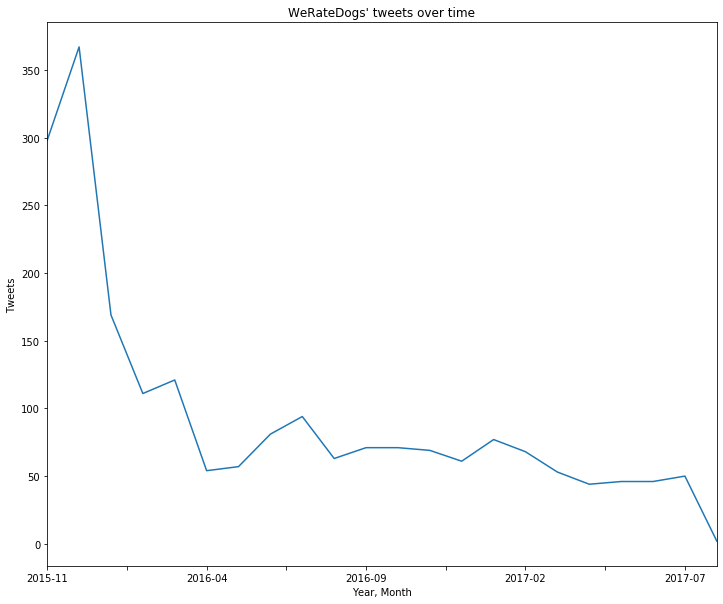

In [84]:
time_plot = df['timestamp'].dt.strftime('%Y-%m').value_counts().sort_index().plot(kind='line', title='WeRateDogs\' tweets over time', figsize=(12,10));
plt.xlabel('Year, Month');
plt.ylabel('Tweets');
plt.savefig('time_tweets')

In [85]:
# checking out the twitter tweets sources
df.source.value_counts()


Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [86]:
print('the percentage of people tweeted with iphone are {}%'.format((len(df[df['source'] == 'Twitter for iPhone'])/(len(df['source'])))*100))

the percentage of people tweeted with iphone are 98.02219006271105%


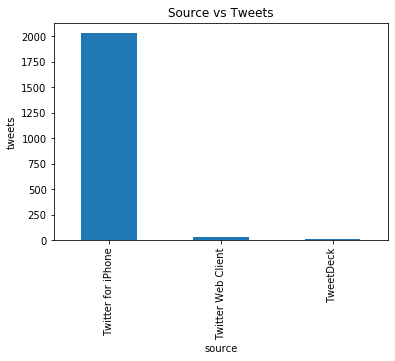

In [87]:
df.source.value_counts().plot(kind='bar',title='Source vs Tweets')
plt.xlabel('source')
plt.ylabel('tweets')
plt.savefig('source')

As seen the twitter for iphone is the most used tweet source, this might suggest that most people who were able to access the thread were iphone users at roughly more than 98%


Taking a look at the distribution of the dog breeds and the number of indivdual tweets about them, suggesting the number of people whose pets were these dogs

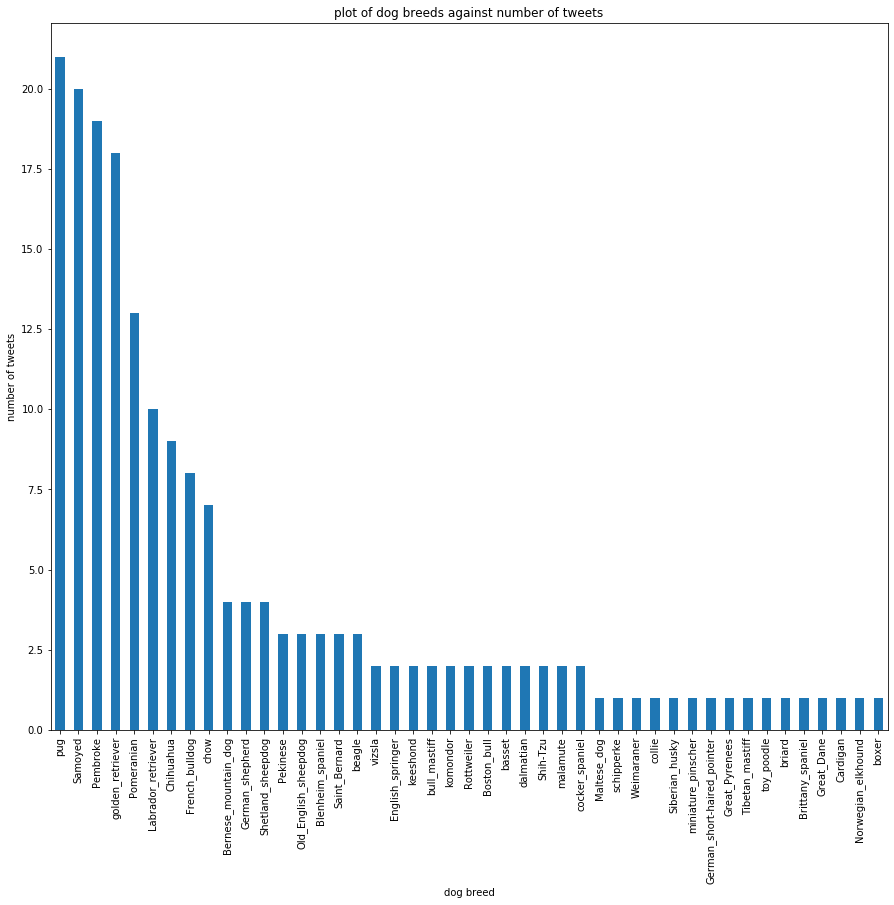

In [88]:
breed_plot = df.dog_breed[df['dog_breed'] != 'None'].value_counts().plot(kind ='bar', title = 'plot of dog breeds against number of tweets', figsize=(15, 13));
breed_plot.set_ylabel('number of tweets');
breed_plot.set_xlabel('dog breed');

The above shows the distribution of the dog breeds 

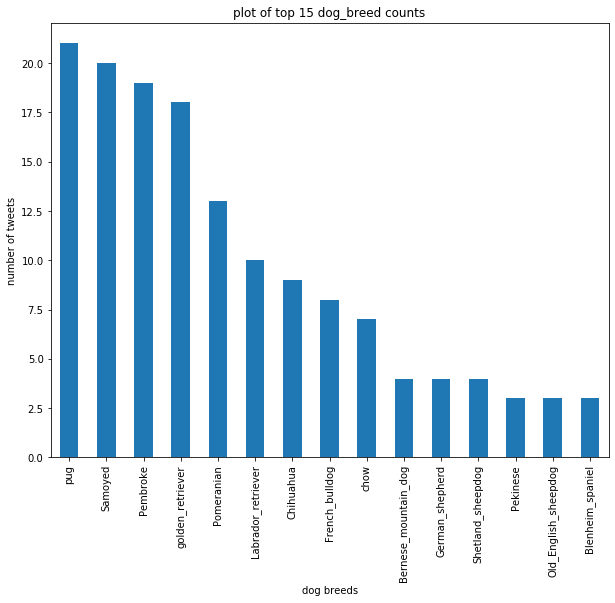

In [89]:
df.dog_breed[df.dog_breed != 'None'].value_counts().head(15).plot(kind='bar', title='plot of top 15 dog_breed counts', figsize = (10,8));
plt.ylabel('number of tweets');
plt.xlabel('dog breeds');
plt.savefig('breed')

In [90]:
df.dog_stage[df['dog_stage'] != 'None'].value_counts()

pupper     210
doggo       78
puppo       24
floofer      8
None         0
Name: dog_stage, dtype: int64

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


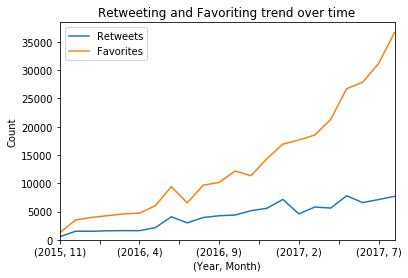

In [91]:
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('time')

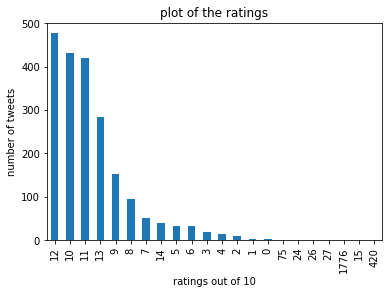

In [92]:
r_plot = df.rating_numerator.value_counts().plot(kind='bar', title = 'plot of the ratings');
plt.ylabel('number of tweets');
plt.xlabel('ratings out of 10');
plt.savefig('rating')

In [93]:
len(df.name[df.name != 'None'].value_counts())

913

We have 913 unique names excluding none in the cleaned dataframe

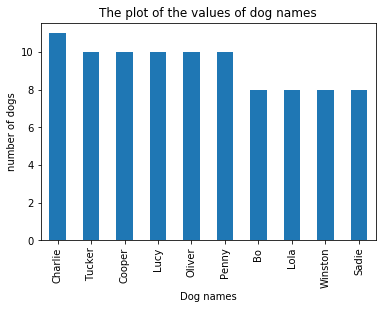

In [94]:
df.name[df.name != 'None'].value_counts().head(10).plot(kind= 'bar');
plt.title('The plot of the values of dog names');
plt.xlabel('Dog names');
plt.ylabel('number of dogs');
plt.savefig('dog_names')

The most frequent dog name is 'charlie'

In [95]:
mean_retweet_doggo = df.retweet_count[df.dog_stage == 'doggo'].mean()
mean_retweet_puppo = df.retweet_count[df.dog_stage == 'puppo'].mean()
mean_retweet_pupper = df.retweet_count[df.dog_stage == 'pupper'].mean()
mean_retweet_floofer = df.retweet_count[df.dog_stage == 'floofer'].mean()
mean_retweets = [mean_retweet_doggo,mean_retweet_puppo,mean_retweet_pupper,mean_retweet_floofer]

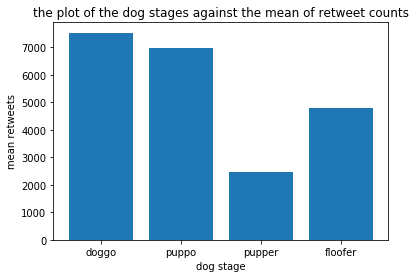

In [96]:
mean_retweets = pd.Series(mean_retweets)
plt.bar(['1','2','3','4'], mean_retweets,tick_label=['doggo','puppo','pupper','floofer']);
plt.title('the plot of the dog stages against the mean of retweet counts')
plt.xlabel('dog stage')
plt.ylabel('mean retweets')
plt.savefig('mean_retweets')

In [97]:
mean_doggo_favs = df.favorite_count[df.dog_stage == 'doggo'].mean()
mean_puppo_favs = df.favorite_count[df.dog_stage == 'puppo'].mean()
mean_pupper_favs = df.favorite_count[df.dog_stage == 'pupper'].mean()
mean_floofer_favs = df.favorite_count[df.dog_stage == 'floofer'].mean()

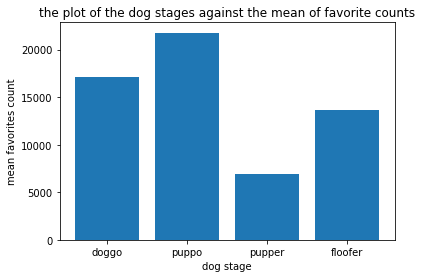

In [98]:
mean_favs = [mean_doggo_favs,mean_puppo_favs,mean_pupper_favs,mean_floofer_favs]
plt.bar(['1','2','3','4'], mean_favs,tick_label=['doggo','puppo','pupper','floofer']);
plt.title('the plot of the dog stages against the mean of favorite counts')
plt.xlabel('dog stage')
plt.ylabel('mean favorites count')
plt.savefig('mean_favs')